# IMPORTS

In [1]:
import tensorflow as tf

import keras

import pandas

import sklearn

import matplotlib

import matplotlib.pyplot as plt

from PIL import Image

import numpy as np

# CONVOLUTIONAL NEURAL NETWORK

For the normal convolutional neural network, the network that will be used is the VGG16 network which is pretrained on the imagenet dataset. This can be used in keras as follows:

In [2]:
from keras.applications.vgg16 import VGG16

In [3]:
model = keras.models.Sequential()
model.add(VGG16(weights = 'imagenet', include_top=False, input_shape=(224,224,3), pooling='avg'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation="linear"))
opt = tf.keras.optimizers.Adam(learning_rate=1e-6, clipvalue=1)
model.compile(loss='mean_squared_error', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


The size of this network in RAM is 14 715 201 * 8 (8 bytes for a double/parameter) = 117 721 608 bytes or 0.109637 GB.

In [3]:
%run data_loader.ipynb 

Then the model can be trained. The input consists of images (224, 224, 3) and average ratings (1). The network is trained on both part separatly. Around 2000 training samples => 2.243 GB. This should be enough to keep in RAM.

In [11]:
nb_parts = 1
nb_epochs = 7

loss_array = np.zeros((nb_epochs*nb_parts,1))
val_loss_array = np.zeros((nb_epochs*nb_parts,1))

for i in range(nb_parts):
    print(i)
    
    (scores_array_train,images_array_train), (scores_array_val, images_array_val) = get_data_CNN(i, nb_parts)

    print(scores_array_val.shape)
    history = model.fit(images_array_train, scores_array_train, batch_size=2, epochs=nb_epochs, validation_data=(images_array_val, scores_array_val))
    
    for j in range(nb_epochs):
        loss_array[i*nb_epochs + j] = history.history['loss'][j]
        val_loss_array[i*nb_epochs + j] = history.history['val_loss'][j]

0
begin_index: 0
middle_index: 1417
end_index: 1890
batch_size: 1890
scores_array_val.shape: (473, 1)
images_array_val.shape: (473, 224, 224, 3)
(473, 1)
Epoch 1/7
709/709 [==============================] - 45s 61ms/step - loss: 0.0111 - val_loss: 0.0182
Epoch 2/7
709/709 [==============================] - 44s 61ms/step - loss: 0.0085 - val_loss: 0.0179
Epoch 3/7
709/709 [==============================] - 44s 63ms/step - loss: 0.0071 - val_loss: 0.0173
Epoch 4/7
709/709 [==============================] - 44s 62ms/step - loss: 0.0059 - val_loss: 0.0171
Epoch 5/7
709/709 [==============================] - 44s 62ms/step - loss: 0.0050 - val_loss: 0.0173
Epoch 6/7
709/709 [==============================] - 44s 62ms/step - loss: 0.0041 - val_loss: 0.0164
Epoch 7/7
709/709 [==============================] - 44s 62ms/step - loss: 0.0036 - val_loss: 0.0188


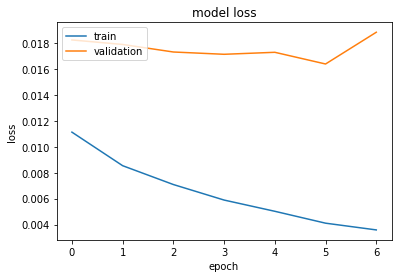

In [14]:
    # summarize history for loss
    plt.plot(loss_array)
    plt.plot(val_loss_array)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [15]:
## CREATE TEST SET

(test_scores, test_images) = get_test_data_CNN()
model.evaluate(x=test_images, y=test_scores)

4/4 [==============================] - 1s 73ms/step - loss: 0.0356


0.03560104966163635

Now we run this code 10 times and return the test results in an array

In [4]:
(scores_array_train,images_array_train), (scores_array_val, images_array_val) = get_data_CNN(0, 1)
(test_scores, test_images) = get_test_data_CNN()

test_results = np.zeros((10,1))

for i in range(10):
    
        model = keras.models.Sequential()
        model.add(VGG16(weights = 'imagenet', include_top=False, input_shape=(112,112,3), pooling='avg'))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(1, activation="linear"))
        opt = tf.keras.optimizers.Adam(learning_rate=1e-6, clipvalue=1)
        model.compile(loss='mean_squared_error', optimizer=opt)

        history = model.fit(images_array_train, scores_array_train, batch_size=2, epochs=7, validation_data=(images_array_val, scores_array_val))

        test_results[i] = model.evaluate(x=test_images, y=test_scores)

begin_index: 0
middle_index: 1417
end_index: 1890
batch_size: 1890
scores_array_val.shape: (473, 1)
images_array_val.shape: (473, 112, 112, 3)
Epoch 1/7
709/709 [==============================] - 28s 31ms/step - loss: 0.2945 - val_loss: 0.0574
Epoch 2/7
709/709 [==============================] - 21s 30ms/step - loss: 0.0394 - val_loss: 0.0409
Epoch 3/7
709/709 [==============================] - 22s 31ms/step - loss: 0.0247 - val_loss: 0.0307
Epoch 4/7
709/709 [==============================] - 22s 30ms/step - loss: 0.0188 - val_loss: 0.0306s: 
Epoch 5/7
709/709 [==============================] - 22s 30ms/step - loss: 0.0148 - val_loss: 0.0237
Epoch 6/7
709/709 [==============================] - 22s 31ms/step - loss: 0.0120 - val_loss: 0.0236
Epoch 7/7
4/4 [==============================] - 1s 122ms/step - loss: 0.0398
Epoch 1/7
709/709 [==============================] - 23s 31ms/step - loss: 0.0364 - val_loss: 0.0284
Epoch 2/7
709/709 [==============================] - 22s 30ms/step - 

Plot the results in a boxplot:

In [ ]:
test_results = [[0.0397753 ],
       [0.0313718 ],
       [0.04557879],
       [0.03742178],
       [0.03523384],
       [0.03892915],
       [0.04765619],
       [0.029062  ],
       [0.03761949],
       [0.03538001]]

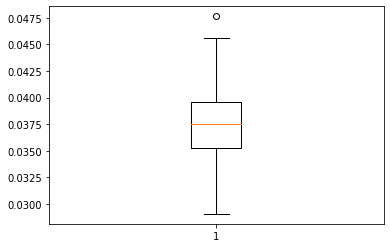

In [5]:
plt.boxplot(test_results)
plt.show()

In [6]:
test_results

array([[0.0397753 ],
       [0.0313718 ],
       [0.04557879],
       [0.03742178],
       [0.03523384],
       [0.03892915],
       [0.04765619],
       [0.029062  ],
       [0.03761949],
       [0.03538001]])

# CONVOLUTIONAL NEURAL NETWORK TRAINED ON CLUSTER DATASET

In [1]:
import tensorflow as tf

import keras

import pandas

import sklearn

import matplotlib

import matplotlib.pyplot as plt

from PIL import Image

import numpy as np

For the normal convolutional neural network, the network that will be used is the VGG16 network which is pretrained on the imagenet dataset. This can be used in keras as follows:

In [2]:
from keras.applications.vgg16 import VGG16

In [3]:
model = keras.models.Sequential()
model.add(VGG16(weights = 'imagenet', include_top=False, input_shape=(112,112,3), pooling='avg'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation="linear"))
opt = tf.keras.optimizers.Adam(learning_rate=1e-6, clipvalue=1)
model.compile(loss='mean_squared_error', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


The layout of the network stays the same as before.

In [4]:
%run data_loader.ipynb 

Then the model can be trained. We will now use the same dataset as the clustered networks will use. This means they have an image per individual rating. With around 20000 training samples this time this gives 20.243 GB of RAM Needed to keep in memory! Since this is too large, a solution will have to be found. SOLUTION = images are scaled down to 112 by 112 by 3!

In [5]:
nb_epochs = 2

[_,images_array_train,scores_array_train], [_,images_array_val,scores_array_val], [_,images_array_test,scores_array_test] = get_data_manual_cluster_network_final()

history = model.fit(images_array_train, scores_array_train, batch_size=2, epochs=nb_epochs, validation_data=(images_array_val, scores_array_val))
    
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

Epoch 1/2
7560/7560 [==============================] - 224s 29ms/step - loss: 0.0828 - val_loss: 0.0742
Epoch 2/2
7560/7560 [==============================] - 219s 29ms/step - loss: 0.0738 - val_loss: 0.0734


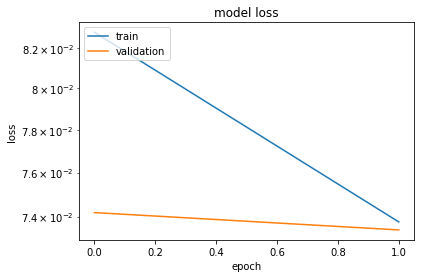

In [6]:
    # summarize history for loss
    plt.plot(loss_array)
    plt.plot(val_loss_array)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.yscale("log")
    plt.show()

In [7]:
# Test Set Performance
model.evaluate(x=images_array_test, y=scores_array_test)

8/8 [==============================] - 2s 129ms/step - loss: 0.0754


0.07538533210754395

# HYBRID NEURAL NETWORK WITH MANUAL CLUSTERING

In [1]:
import tensorflow as tf

import keras

import pandas

import sklearn

import matplotlib

import matplotlib.pyplot as plt

from PIL import Image

import numpy as np

Now we need to use a manual clustering method to cluster the data of the participants into different clusters, and use this information as input for a hybrid neural network. We will start with the clustering, we can do this using the sklearn library:

In [2]:
%run data_loader.ipynb 
from keras.applications.vgg16 import VGG16

Structure of the network. Hybrid structure with two inputs, a single number representing the cluster of the current rating, and images.

In [3]:
inputA = keras.layers.Input(shape=(1,))
inputB = keras.layers.Input(shape=(112,112,3))

x = keras.layers.Dense(19, activation="relu")(inputA)
x = keras.models.Model(inputs=inputA, outputs=x)

y = keras.models.Sequential()
y.add(VGG16(weights = 'imagenet', include_top=False, input_shape=(112,112,3), pooling='avg'))
y.add(keras.layers.Flatten())

combined = keras.layers.concatenate([x.output, y.output])

#z = keras.layers.Dense(19, activation="relu")(combined)
#z = keras.layers.Dropout(0.5, input_shape=(19,))(z)
z = keras.layers.Dense(1)(combined)

model = keras.models.Model(inputs=[x.input, y.input], outputs=z)

opt = tf.keras.optimizers.Adam(learning_rate=1e-6, clipvalue=1)

#model.compile(loss="mean_absolute_percentage_error", optimizer="rmsprop")
model.compile(loss='mean_squared_error', optimizer=opt)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
vgg16_input (InputLayer)        [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 512)          14714688    vgg16_input[0][0]                
__________________________________________________________________________________________________
dense (Dense)                   (None, 19)           38          input_1[0][0]                    
____________________________________________________________________________________________

In [4]:
[cluster_array_train,image_array_train,rating_array_train], [cluster_array_val,image_array_val,rating_array_val], [cluster_array_test,image_array_test,rating_array_test] = get_data_manual_cluster_network_final()
    
history = model.fit(x=[cluster_array_train, image_array_train], y=rating_array_train, validation_data=([cluster_array_val, image_array_val], rating_array_val), epochs=2, batch_size=2)

loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

Epoch 1/2
7560/7560 [==============================] - 229s 30ms/step - loss: 0.0857 - val_loss: 0.0744
Epoch 2/2
7560/7560 [==============================] - 224s 30ms/step - loss: 0.0739 - val_loss: 0.0731


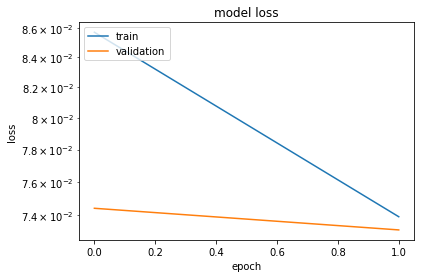

In [5]:
# summarize history for loss
plt.plot(loss_array)
plt.plot(val_loss_array)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.yscale("log")
plt.show()

In [6]:
## CREATE TEST SET
model.evaluate(x=[cluster_array_test, image_array_test], y=rating_array_test)

8/8 [==============================] - 2s 129ms/step - loss: 0.0836


0.08361538499593735

# HYBRID NEURAL NETWORK WITH SOM PRETRAINED

In [1]:
import tensorflow as tf

import keras

import pandas

import sklearn

import matplotlib

import matplotlib.pyplot as plt

from PIL import Image

import numpy as np

Now we will train a hybrid network which contains a SOM network and a CNN network. The SOM network replaced the manually clustered part of the previous network by letting the neural network do the clustering itself.

In [2]:
%run data_loader.ipynb 
from keras.applications.vgg16 import VGG16

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, InputSpec


class SOMLayer(Layer):
    """
    Self-Organizing Map layer class with rectangular topology
    # Example
    ```
        model.add(SOMLayer(map_size=(10,10)))
    ```
    # Arguments
        map_size: Tuple representing the size of the rectangular map. Number of prototypes is map_size[0]*map_size[1].
        prototypes: Numpy array with shape `(n_prototypes, latent_dim)` witch represents the initial cluster centers
    # Input shape
        2D tensor with shape: `(n_samples, latent_dim)`
    # Output shape
        2D tensor with shape: `(n_samples, n_prototypes)`
    """

    def __init__(self, map_size, prototypes=None, **kwargs):
        if 'input_shape' not in kwargs and 'latent_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('latent_dim'),)
        super(SOMLayer, self).__init__(**kwargs)
        self.map_size = map_size
        self.n_prototypes = map_size[0]*map_size[1]
        self.initial_prototypes = prototypes
        self.input_spec = InputSpec(ndim=2)
        self.prototypes = None
        self.built = False

    def build(self, input_shape):
        assert(len(input_shape) == 2)
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=tf.float32, shape=(None, input_dim))
        self.prototypes = self.add_weight(shape=(self.n_prototypes, input_dim), initializer='glorot_uniform', name='prototypes')
        if self.initial_prototypes is not None:
            self.set_weights(self.initial_prototypes)
            del self.initial_prototypes
        self.built = True

    def call(self, inputs, **kwargs):
        """
        Calculate pairwise squared euclidean distances between inputs and prototype vectors
        Arguments:
            inputs: the variable containing data, Tensor with shape `(n_samples, latent_dim)`
        Return:
            d: distances between inputs and prototypes, Tensor with shape `(n_samples, n_prototypes)`
        """
        # Note: (tf.expand_dims(inputs, axis=1) - self.prototypes) has shape (n_samples, n_prototypes, latent_dim)
        d = tf.reduce_sum(tf.square(tf.expand_dims(inputs, axis=1) - self.prototypes), axis=2)
        return d

    def compute_output_shape(self, input_shape):
        assert(input_shape and len(input_shape) == 2)
        return input_shape[0], self.n_prototypes

    def get_config(self):
        config = {'map_size': self.map_size}
        base_config = super(SOMLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

def som_loss(weights, distances):
    """
    SOM loss
    # Arguments
        weights: weights for the weighted sum, Tensor with shape `(n_samples, n_prototypes)`
        distances: pairwise squared euclidean distances between inputs and prototype vectors, Tensor with shape `(n_samples, n_prototypes)`
    # Return
        SOM reconstruction loss
    """
    return tf.reduce_mean(tf.reduce_sum(weights*distances, axis=1))

First, we will create a SOM network and pretrain it on the data.

In [4]:
inputA = keras.layers.Input(shape=(1990))
x = SOMLayer((1990,1))(inputA)
x = keras.models.Model(inputs=inputA, outputs=x)

x.compile(loss=som_loss, optimizer="adam")

In [5]:
cluster_array_train = get_data_SOM_pretrain()

x.fit(x=cluster_array_train, y=cluster_array_train, epochs=150, batch_size=2)

Epoch 1/150
17/17 [==============================] - 1s 14ms/step - loss: 480388.7500
Epoch 2/150
17/17 [==============================] - 0s 3ms/step - loss: 448012.7500
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 417144.0938
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 387858.0625
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 360144.2188
Epoch 6/150
17/17 [==============================] - 0s 3ms/step - loss: 333960.6562
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 309256.7188
Epoch 8/150
17/17 [==============================] - 0s 3ms/step - loss: 285979.8125
Epoch 9/150
17/17 [==============================] - 0s 3ms/step - loss: 264077.2500
Epoch 10/150
17/17 [==============================] - 0s 3ms/step - loss: 243496.4844
Epoch 11/150
17/17 [==============================] - 0s 3ms/step - loss: 224185.2812
Epoch 12/150
17/17 [==============================] - 0s 3ms/s

17/17 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 100/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 101/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 102/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 103/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 104/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 105/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 106/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 107/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 108/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 109/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 110/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 111/150
17/17 [=========

Then we will create a network with the SOM network included: (In this network, the SOM layer will be frozen)

In [6]:
inputB = keras.layers.Input(shape=(112,112,3))

x.trainable=False

y = keras.models.Sequential()
y.add(VGG16(weights = 'imagenet', include_top=False, input_shape=(112,112,3), pooling='avg'))
y.add(keras.layers.Flatten())

a = keras.layers.Dense(128, activation="relu")(x.output)
a = keras.layers.Dense(19, activation="relu")(a)

z = keras.layers.concatenate([a, y.output])

z = keras.layers.Dense(1, activation="linear")(z)

model = keras.models.Model(inputs=[x.input, y.input], outputs=z)

#model.compile(loss="mean_absolute_percentage_error", optimizer="adam")

opt = tf.keras.optimizers.Adam(learning_rate=1e-6, clipvalue=1)

#model.compile(loss="mean_absolute_percentage_error", optimizer="rmsprop")
model.compile(loss='mean_squared_error', optimizer=opt)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1990)]       0                                            
__________________________________________________________________________________________________
som_layer (SOMLayer)            (None, 1990)         3960100     input_1[0][0]                    
__________________________________________________________________________________________________
vgg16_input (InputLayer)        [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          254848      som_layer[0][0]                  
____________________________________________________________________________________________

In [7]:
[cluster_array_train,image_array_train,rating_array_train], [cluster_array_val,image_array_val,rating_array_val], [cluster_array_test,image_array_test,rating_array_test] = get_data_SOM_network_final()
    
history = model.fit(x=[cluster_array_train, image_array_train], y=rating_array_train, validation_data=([cluster_array_val, image_array_val], rating_array_val), epochs=2, batch_size=2)

loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

Epoch 1/2
7560/7560 [==============================] - 242s 32ms/step - loss: 111.7037 - val_loss: 0.1069
Epoch 2/2
7560/7560 [==============================] - 239s 32ms/step - loss: 0.1458 - val_loss: 0.0578


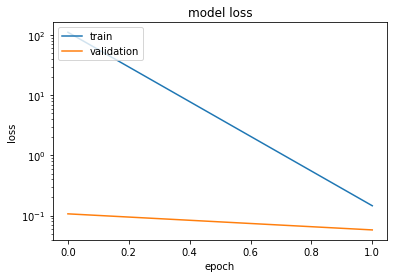

In [8]:
# summarize history for loss
plt.plot(loss_array)
plt.plot(val_loss_array)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.yscale("log")
plt.show()

In [9]:
## CREATE TEST SET
model.evaluate(x=[cluster_array_test, image_array_test], y=rating_array_test)

8/8 [==============================] - 2s 136ms/step - loss: 0.0365


0.03645927086472511

# HYBRID NEURAL NETWORK WITH SOM UNFROZEN

In [1]:
import tensorflow as tf

import keras

import pandas

import sklearn

import matplotlib

import matplotlib.pyplot as plt

from PIL import Image

import numpy as np

Now we will train a hybrid network which contains a SOM network and a CNN network. The SOM network replaced the manually clustered part of the previous network by letting the neural network do the clustering itself. The difference between the previous SOM network is that now the SOM network will be retrained with the rest of the network.

In [2]:
%run data_loader.ipynb 
from keras.applications.vgg16 import VGG16

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, InputSpec


class SOMLayer(Layer):
    """
    Self-Organizing Map layer class with rectangular topology
    # Example
    ```
        model.add(SOMLayer(map_size=(10,10)))
    ```
    # Arguments
        map_size: Tuple representing the size of the rectangular map. Number of prototypes is map_size[0]*map_size[1].
        prototypes: Numpy array with shape `(n_prototypes, latent_dim)` witch represents the initial cluster centers
    # Input shape
        2D tensor with shape: `(n_samples, latent_dim)`
    # Output shape
        2D tensor with shape: `(n_samples, n_prototypes)`
    """

    def __init__(self, map_size, prototypes=None, **kwargs):
        if 'input_shape' not in kwargs and 'latent_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('latent_dim'),)
        super(SOMLayer, self).__init__(**kwargs)
        self.map_size = map_size
        self.n_prototypes = map_size[0]*map_size[1]
        self.initial_prototypes = prototypes
        self.input_spec = InputSpec(ndim=2)
        self.prototypes = None
        self.built = False

    def build(self, input_shape):
        assert(len(input_shape) == 2)
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=tf.float32, shape=(None, input_dim))
        self.prototypes = self.add_weight(shape=(self.n_prototypes, input_dim), initializer='glorot_uniform', name='prototypes')
        if self.initial_prototypes is not None:
            self.set_weights(self.initial_prototypes)
            del self.initial_prototypes
        self.built = True

    def call(self, inputs, **kwargs):
        """
        Calculate pairwise squared euclidean distances between inputs and prototype vectors
        Arguments:
            inputs: the variable containing data, Tensor with shape `(n_samples, latent_dim)`
        Return:
            d: distances between inputs and prototypes, Tensor with shape `(n_samples, n_prototypes)`
        """
        # Note: (tf.expand_dims(inputs, axis=1) - self.prototypes) has shape (n_samples, n_prototypes, latent_dim)
        d = tf.reduce_sum(tf.square(tf.expand_dims(inputs, axis=1) - self.prototypes), axis=2)
        return d

    def compute_output_shape(self, input_shape):
        assert(input_shape and len(input_shape) == 2)
        return input_shape[0], self.n_prototypes

    def get_config(self):
        config = {'map_size': self.map_size}
        base_config = super(SOMLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

def som_loss(weights, distances):
    """
    SOM loss
    # Arguments
        weights: weights for the weighted sum, Tensor with shape `(n_samples, n_prototypes)`
        distances: pairwise squared euclidean distances between inputs and prototype vectors, Tensor with shape `(n_samples, n_prototypes)`
    # Return
        SOM reconstruction loss
    """
    return tf.reduce_mean(tf.reduce_sum(weights*distances, axis=1))

First, we will create a SOM network and pretrain it on the data.

In [4]:
inputA = keras.layers.Input(shape=(1990))
x = SOMLayer((1990,1))(inputA)
x = keras.models.Model(inputs=inputA, outputs=x)

x.compile(loss=som_loss, optimizer="adam")

In [5]:
cluster_array_train = get_data_SOM_pretrain()

x.fit(x=cluster_array_train, y=cluster_array_train, epochs=150, batch_size=2)

Epoch 1/150
17/17 [==============================] - 1s 13ms/step - loss: 480357.9062
Epoch 2/150
17/17 [==============================] - 0s 3ms/step - loss: 447982.8750
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 417115.4688
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 387830.4688
Epoch 5/150
17/17 [==============================] - 0s 3ms/step - loss: 360117.7812
Epoch 6/150
17/17 [==============================] - 0s 3ms/step - loss: 333935.2812
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 309232.4375
Epoch 8/150
17/17 [==============================] - 0s 3ms/step - loss: 285956.5938
Epoch 9/150
17/17 [==============================] - 0s 3ms/step - loss: 264055.0938
Epoch 10/150
17/17 [==============================] - 0s 3ms/step - loss: 243475.3750
Epoch 11/150
17/17 [==============================] - 0s 3ms/step - loss: 224165.2500
Epoch 12/150
17/17 [==============================] - 0s 3ms/s

17/17 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 99/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 100/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 101/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 102/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 103/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 104/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 105/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 106/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 107/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 108/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 109/150
17/17 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 110/150
17/17 [==========

Then we will create a network with the SOM network included: (In this network, the SOM layer will NOT be frozen)

In [6]:
inputB = keras.layers.Input(shape=(112,112,3))

y = keras.models.Sequential()
y.add(VGG16(weights = 'imagenet', include_top=False, input_shape=(112,112,3), pooling='avg'))
y.add(keras.layers.Flatten())

a = keras.layers.Dense(19, activation="relu")(x.output)

z = keras.layers.concatenate([a, y.output])

z = keras.layers.Dense(1, activation="linear")(z)

model = keras.models.Model(inputs=[x.input, y.input], outputs=z)

#model.compile(loss="mean_absolute_percentage_error", optimizer="adam")

opt = tf.keras.optimizers.Adam(learning_rate=1e-6, clipvalue=1)

#model.compile(loss="mean_absolute_percentage_error", optimizer="rmsprop")
model.compile(loss='mean_squared_error', optimizer=opt)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1990)]       0                                            
__________________________________________________________________________________________________
vgg16_input (InputLayer)        [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
som_layer (SOMLayer)            (None, 1990)         3960100     input_1[0][0]                    
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 512)          14714688    vgg16_input[0][0]                
____________________________________________________________________________________________

In [7]:
[cluster_array_train,image_array_train,rating_array_train], [cluster_array_val,image_array_val,rating_array_val], [cluster_array_test,image_array_test,rating_array_test] = get_data_SOM_network_final()
    
history = model.fit(x=[cluster_array_train, image_array_train], y=rating_array_train, validation_data=([cluster_array_val, image_array_val], rating_array_val), epochs=5, batch_size=2)

loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

Epoch 1/5
7560/7560 [==============================] - 258s 33ms/step - loss: 912.2121 - val_loss: 2.3116A: 1:19 - - ETA: 1:19 - loss: 137 - ETA: 1:19 - loss: 1375. - ETA: 1:19 - loss: 1 - ETA: 1:18 - los - ETA: 1:01 - loss: 1236.30 - ETA: 1:01 - loss: 1235.86 - ETA - ETA - ETA - ETA: 53s - loss: 1 - ETA: 52s - lo - ETA: 51s - loss: 1170.55 - ETA: 51s - loss: 1169.7 - ETA: 51s - loss - E - ETA: 49s - loss: 1154.52 - ETA: 49 - ETA: 48s - loss: 11 - ETA: 47s - loss: 1143 - ETA: 47s - loss: 1141.934 - ETA: 47s -  - ETA: 46s - l - ETA: 45s - loss: 1130.7 - ETA: 45s - loss:  - ETA: 44s - - ETA: 43s - lo  - ETA: 39s - loss - ETA: 38s - loss:  - ETA: 38s - loss: 1088.720  - ETA: 34s - loss - ETA: 33s - loss: 1065.56 -  - ETA: 24s - l - E - E - ETA: 0s - loss: 
Epoch 2/5
7560/7560 [==============================] - 251s 33ms/step - loss: 1.2911 - val_loss: 0.6704
Epoch 3/5
7560/7560 [==============================] - 251s 33ms/step - loss: 0.4792 - val_loss: 0.1785 1:35 - loss: 0.56 - ETA: 1:3

7560/7560 [==============================] - 251s 33ms/step - loss: 0.1684 - val_loss: 0.07183:41 - loss: 0.167 - ETA: 3:41 - loss: 0.167 - ETA: 3:41 - loss: - ETA: 3: - ETA: 3: - ETA: 3:39 - ETA: 3:38 - loss:  - ETA: 3:38 - l - ETA: 3:3 - ETA: 3:36 - loss: 0. - ETA: 3:36 - ETA: 3:35 - loss: 0.1 - ETA: 3:35 - ETA: 3:34 - loss:  - ETA: 3:33 - loss: - ETA: 3:33 - loss - ETA: 3:33 - loss: 0.172 - ETA: 3:33 - loss: 0. - ETA: 3:32 - loss: 0.17 - ETA: - ETA: 3:31 - loss: 0. - ETA:  - ETA: 3: - ETA: 3:2 - ETA: 3:27 - loss: 0.180 - ETA: 3:27 - lo - ETA: 3:27 - loss: - ETA: 3:26 - loss: 0.18 - - ETA: 3:25 - loss: 0.182 - ETA: 3:25 - loss: 0. - ETA: 3:24 - l - ETA: 3:24 - loss: - ETA: 3:2 - ETA: 3:20 - l - ETA: 3:20 - loss: 0.18 - ETA: 3:20 - lo - ETA: 3:12 - los - ETA: 3:12 - loss: 0.17 - ETA: 3:12 - loss: - ETA: 3:1 - ETA: 3:10 - loss: 0.176 - - ETA: 3:09 - l - E - ETA: 3:07 - loss: 0.1 - ETA: 3:06 - - ETA: 3:02 - loss: 0. - ETA: 3:02 - loss: 0 - ETA: 3:02 - loss: 0.171 - ETA: 3:02 - loss: 0. 

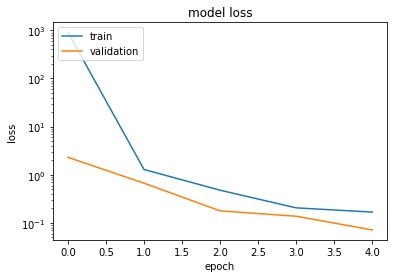

In [8]:
# summarize history for loss
plt.plot(loss_array)
plt.plot(val_loss_array)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.yscale("log")
plt.show()

In [9]:
## CREATE TEST SET
model.evaluate(x=[cluster_array_test, image_array_test], y=rating_array_test)

8/8 [==============================] - 2s 137ms/step - loss: 0.0483


0.04826787859201431

# BOXPLOT

Now we will combine all boxplots into a single one:

In [13]:
DCNN = [0.0808,0.0782,0.0726,0.0847,0.0768,0.0825,0.0733,0.0710,0.0776,0.0754]
Hybrid1 = [0.0716,0.0681,0.0748, 0.0735,0.0898,0.0740,0.0788,0.0676,0.0675,0.0836]
SOM1 = [0.0204,0.0677,0.1043,0.0617,0.2248,0.0233,0.0365,0.1438,0.0195,0.0365]
SOM2 = [0.0422,0.0210,0.0197,0.0192,0.0241,0.0255,0.1407,0.0257,0.0483,0.0189]

In [14]:
data = [DCNN, Hybrid1, SOM1, SOM2]

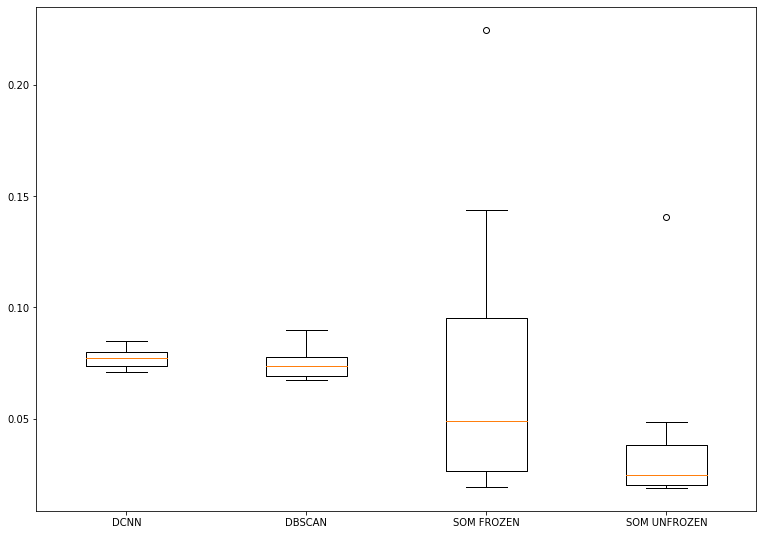

In [15]:
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(['DCNN', 'DBSCAN',
                    'SOM FROZEN', 'SOM UNFROZEN'])
 
# show plot
plt.show()

# Statistical Analysis

Now we have to calculate the Shapiro-Wilk test for each dataset:

In [16]:
import scipy

DCNN_pvalue = scipy.stats.shapiro(DCNN).pvalue
Hybrid1_pvalue = scipy.stats.shapiro(Hybrid1).pvalue
SOM1_pvalue = scipy.stats.shapiro(SOM1).pvalue
SOM2_pvalue = scipy.stats.shapiro(SOM2).pvalue

In [17]:
DCNN_pvalue

0.9073078036308289

In [18]:
Hybrid1_pvalue

0.20094682276248932

In [19]:
SOM1_pvalue

0.022868921980261803

In [20]:
SOM2_pvalue

2.8840840968769044e-05

For each pvalue above 0.05, do a paired t-test

In [46]:
DCNN_Hybrid1_pvalue = scipy.stats.ttest_rel(DCNN, Hybrid1)
DCNN_SOM1_pvalue = scipy.stats.wilcoxon(DCNN, SOM1)
DCNN_SOM2_pvalue = scipy.stats.ttest_rel(DCNN, SOM2)
Hybrid1_SOM1_pvalue = scipy.stats.wilcoxon(Hybrid1, SOM1)
Hybrid1_SOM2_pvalue = scipy.stats.wilcoxon(Hybrid1, SOM2)
SOM1_SOM2_pvalue = scipy.stats.wilcoxon(SOM1, SOM2)

In [47]:
DCNN_Hybrid1_pvalue

Ttest_relResult(statistic=0.8381521789266678, pvalue=0.42364507310587873)

In [48]:
DCNN_SOM1_pvalue

WilcoxonResult(statistic=22.0, pvalue=0.625)

In [49]:
DCNN_SOM2_pvalue

Ttest_relResult(statistic=3.16486218694003, pvalue=0.01146025503296051)

In [50]:
Hybrid1_SOM1_pvalue

WilcoxonResult(statistic=22.0, pvalue=0.625)

In [43]:
Hybrid1_SOM2_pvalue

WilcoxonResult(statistic=8.0, pvalue=0.048828125)

In [44]:
SOM1_SOM2_pvalue

WilcoxonResult(statistic=16.0, pvalue=0.275390625)

In [45]:
np.mean(DCNN)

0.07729

In [33]:
np.mean(Hybrid1)

0.07493

In [34]:
np.mean(SOM1)

0.07385

In [35]:
np.mean(SOM2)

0.038529999999999995

In [36]:
np.std(DCNN)

0.004202249397644077

In [37]:
np.std(Hybrid1)

0.0069344141785734155